# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 2: Binary Classification and Performance Metrics

## Learning Objectives

At the end of the experiment, you will be able to:

* learn about Classification tasks in Machine learning

* perform Logistic Regression, Softmax Regression

* learn the appropriate performance metrics according to use case

* have an understanding of Decision Boundaries

## Information

### Classification

**Classification** refers to a predictive modeling problem where a class label is predicted for a given example of input data.

**Examples include:**

* Email spam detection (spam or not).
* Churn prediction (churn or not).
* Conversion prediction (buy or not).

**Binary classification** refers to those classification tasks that have two class labels.

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). 

### Implementing Binary Classification with Logistic Regression 

## Dataset

In this example, we will be using "Social_Network_Ads" dataset. 

The variable descriptions are as follows:

* Age
* EstimatedSalary

The target feature is:
* Purchased

Problem Statement: To predict if a person will purchase an item based on age and estimated salary. 

### Setup Steps:

### Importing required packages


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#### Importing the Dataset

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 1].values # estimated salary
y = df.iloc[:, -1].values
X = X.reshape(-1, 1)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
print(X_train)

[[ 39000]
 [120000]
 [ 50000]
 [135000]
 [ 21000]
 [104000]
 [ 42000]
 [ 61000]
 [ 50000]
 [ 63000]
 [ 25000]
 [ 50000]
 [ 73000]
 [ 49000]
 [ 29000]
 [ 65000]
 [131000]
 [ 89000]
 [ 82000]
 [ 51000]
 [ 15000]
 [102000]
 [112000]
 [107000]
 [ 53000]
 [ 59000]
 [ 41000]
 [134000]
 [113000]
 [148000]
 [ 15000]
 [ 42000]
 [ 19000]
 [149000]
 [ 96000]
 [ 59000]
 [ 96000]
 [ 89000]
 [ 72000]
 [ 26000]
 [ 69000]
 [ 82000]
 [ 74000]
 [ 80000]
 [ 72000]
 [149000]
 [ 71000]
 [146000]
 [ 79000]
 [ 75000]
 [ 51000]
 [ 75000]
 [ 78000]
 [ 61000]
 [108000]
 [ 82000]
 [ 74000]
 [ 65000]
 [ 80000]
 [117000]
 [ 61000]
 [ 68000]
 [ 44000]
 [ 87000]
 [ 33000]
 [ 90000]
 [ 42000]
 [123000]
 [118000]
 [ 87000]
 [ 71000]
 [ 70000]
 [ 39000]
 [ 23000]
 [147000]
 [138000]
 [ 86000]
 [ 79000]
 [138000]
 [ 23000]
 [ 60000]
 [113000]
 [107000]
 [ 33000]
 [ 80000]
 [ 96000]
 [ 18000]
 [ 71000]
 [129000]
 [ 76000]
 [ 44000]
 [118000]
 [ 90000]
 [ 30000]
 [ 43000]
 [ 78000]
 [ 59000]
 [ 42000]
 [ 74000]
 [ 91000]


In [ ]:

print(X_test)

[[ 87000]
 [ 50000]
 [ 75000]
 [ 79000]
 [ 50000]
 [ 20000]
 [ 15000]
 [144000]
 [ 68000]
 [ 43000]
 [ 49000]
 [ 55000]
 [ 55000]
 [ 77000]
 [ 86000]
 [117000]
 [ 77000]
 [ 85000]
 [130000]
 [ 22000]
 [ 47000]
 [144000]
 [ 51000]
 [105000]
 [ 28000]
 [141000]
 [ 87000]
 [ 80000]
 [ 62000]
 [ 86000]
 [ 88000]
 [ 79000]
 [ 60000]
 [ 53000]
 [ 58000]
 [ 52000]
 [ 81000]
 [ 43000]
 [ 34000]
 [ 36000]
 [ 88000]
 [ 52000]
 [ 84000]
 [ 20000]
 [112000]
 [ 58000]
 [ 80000]
 [ 90000]
 [ 30000]
 [ 86000]
 [122000]
 [ 25000]
 [ 57000]
 [115000]
 [ 88000]
 [ 32000]
 [ 83000]
 [ 80000]
 [ 28000]
 [ 20000]
 [ 18000]
 [ 42000]
 [ 76000]
 [ 99000]
 [ 26000]
 [ 83000]
 [ 89000]
 [ 58000]
 [ 47000]
 [ 70000]
 [150000]
 [ 77000]
 [ 63000]
 [ 22000]
 [ 89000]
 [ 82000]
 [ 79000]
 [ 60000]
 [ 34000]
 [107000]
 [144000]
 [ 83000]
 [ 55000]
 [ 35000]
 [ 38000]
 [ 80000]
 [ 75000]
 [130000]
 [ 41000]
 [ 60000]
 [ 64000]
 [146000]
 [ 48000]
 [ 33000]
 [ 84000]
 [ 96000]
 [ 63000]
 [ 33000]
 [ 90000]
 [104000]]

In [ ]:

print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


#### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

In [ ]:

print(X_test)

#### Training the Logistic Regression model on the Training set




In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting a new test instance

In [ ]:
print(classifier.predict(sc.transform([[87000]])))

[0]


#### Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Model Evaluation 

To evaluate the performance of a classification model, the following metrics are used:

* Confusion matrix
  * Accuracy
  * Precision
  * Recall
  * F1-Score
* ROC curve
* AUROC

#### Confusion Matrix

* **Confusion matrix:**  is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known. 

  * **true positive** for correctly predicted event values.
  * **false positive** for incorrectly predicted event values.
  * **true negative** for correctly predicted no-event values.
  * **false negative** for incorrectly predicted no-event values.
* **Accuracy:** it is the ratio of the number of correct predictions to the total number of input samples.


In [ ]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[66  2]
 [17 15]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.87        68
           1       0.88      0.47      0.61        32

    accuracy                           0.81       100
   macro avg       0.84      0.72      0.74       100
weighted avg       0.82      0.81      0.79       100



This Confusion Matrix tells us that there were 81 correct predictions and 19 incorrect ones.

* True Positive: 66
* True Negative: 15
* False Positive: 2
* False Negative: 17

#### Precision-Recall Metrics

* **Precision:** summarizes the fraction of examples assigned the positive class that belongs to the positive class.

    Precision = $\mathbf{\frac{TruePositive}{TruePositive + FalsePositive}}$

* **Recall:** summarizes how well the positive class was predicted and is the same calculation as sensitivity.

   Recall = $\mathbf{\frac{TruePositive}{TruePositive + FalseNegative}}$

* **F1-score:** precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.
  
   F1-score = $\mathbf{\frac{2*Precision*Recall}{Precision+Recall}}$

##### Plotting precision-recall curve using sklearn

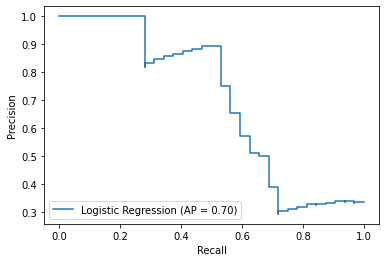

In [ ]:
# Use sklearn to plot precision-recall curves

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(classifier, X_test, y_test, name = 'Logistic Regression')

The above diagram shows the blue line as precision-recall curve.

### ROC-AUC curve

A ROC curve is a diagnostic plot for summarizing the behavior of a model by calculating the false positive rate and true positive rate for a set of predictions by the model under different thresholds.

Area Under Curve (AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problems.

AUC has a range of [0, 1]. The greater the value, the better is the performance of our model.

#### Plotting the ROC-AUC curve for Logistic Regression algorithm using matplotlib

In [ ]:
# roc_curve() computes the ROC for the classifier and returns the FPR, TPR, and threshold values
from sklearn.metrics import roc_curve

classifier.fit(X_train, y_train)
pred_prob1 = classifier.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

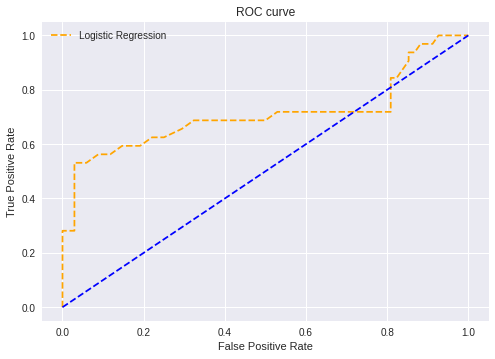

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title("ROC curve")
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The above diagram shows:

ROC curve: is the orange dotted line

AUROC: is the area under the orange dotted line

The blue dotted line is the reference line.

Please refer to the given [link](https://heartbeat.fritz.ai/evaluation-metrics-for-machine-learning-models-d42138496366) for further information on Performance metrics

### Example: Predicting Diabetes with Logistic Regression

Let us now apply the above learnings to perform a logistic regression using a 'UCI PIMA Indian Diabetes' dataset.

 * Fit the model
 * Do the prediction
 * Plot the ROC-AUC curve for the Logistic Regression algorithm



#### Dataset

In this example, we will be using the "UCI PIMA Indian Diabetes" dataset.

The datasets consist of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

The variable descriptions are as follows:

* Pregnancies: Number of Pregnancies
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* Blood pressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* Age: Age (years)
* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

Problem statement:

We will be using this dataset to predict if a person has diabetes or not using the medical attributes provided.

#### Importing the dataset

In [ ]:
DF = pd.read_csv('diabetes.csv')
print(DF.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


#### Finding if there are any null values

In [ ]:

DF.isnull().values.any()

False

#### Training our model

In [ ]:
# Separating the data into independent and dependent variables

X = DF.iloc[: , :-1]
y = DF.iloc[: ,-1].values

#### Splitting the data into training and testing data

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Training the Logistic Regression model on the Training set

In [ ]:

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_test)
print(X_train)

[[-0.82986389  2.4576282   0.33249916 ...  1.34420526  2.78665365
  -0.96584853]
 [-0.53768687 -0.44693118  0.2272108  ...  0.17490974 -0.19434743
  -0.88246592]
 [ 0.04666716 -1.42564141 -0.40451932 ...  0.22520202 -0.23349189
  -0.71570071]
 ...
 [-0.82986389 -0.38378859 -0.50980767 ... -0.85608201  1.4406865
  -1.04923114]
 [-0.24550986  0.21606607  0.43778751 ... -1.39672402 -0.60385869
   1.7857775 ]
 [ 0.33884418 -1.04678584  0.43778751 ... -0.57947447 -0.63396981
   0.28489057]]
[[ 1.50755225 -1.01521454 -0.40451932 ... -1.22070104 -0.98325882
  -0.04863985]
 [-0.82986389 -0.09964691 -0.61509602 ...  0.13719053 -0.62493647
  -0.88246592]
 [-1.12204091 -0.95207195  0.54307587 ...  0.0240329   0.39884168
  -0.5489355 ]
 ...
 [ 0.04666716 -0.85735805 -0.24658679 ... -0.9440935  -0.96519215
  -1.04923114]
 [ 2.09190629 -1.14149973  0.2272108  ... -0.26514771 -0.5075031
   0.11812536]
 [ 0.33884418  0.46863645  0.64836422 ... -4.04964181  0.51627505
   2.953134  ]]


#### Training/Fitting the Model

In [ ]:

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Making Predictions

In [ ]:

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

#### Confusion Matrix

In [ ]:

c = confusion_matrix(y_test, y_pred)
print(c)
print(classification_report(y_test, y_pred))

[[118  12]
 [ 26  36]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



#### Plotting the ROC curve for Logistic Regression algorithm using matplotlib

In [ ]:

p = classifier.predict_proba(X_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

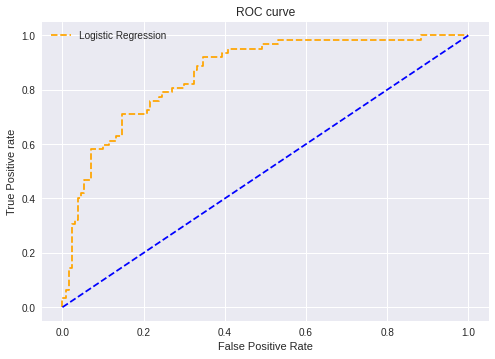

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

###  Softmax Regression

The **Softmax regression** is a form of logistic regression that normalizes an input value into a vector of values that follows a probability distribution whose total sums up to 1.

It is also called **multinomial logistic regression.**

Performing Softmax Regression on the above dataset "Social_Network_Ads"

In [ ]:
X = df.iloc[:, :-1].values # considering age,estimated salary

y = df.iloc[:, -1].values

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Feature Scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

#### Training the Softmax Regression model on the Training set

In [ ]:
softmax_reg = LogisticRegression(multi_class='multinomial', # switch to Softmax Regression
                                     solver='lbfgs', # handle multinomial loss, L2 penalty
                                     C=10)
softmax_reg.fit(X,y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting a new result

In [ ]:
softmax_reg.predict(sc.transform([[30,87000]]))

array([0])

In [ ]:
softmax_reg.predict_proba(sc.transform([[30,87000]]))

array([[0.50000034, 0.49999966]])

### Decision Boundary

In classification problems with two or more classes, a decision boundary is a hypersurface that separates the underlying vector space into sets, one for each class.

#### Creating Dummy Dataset

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

#### Creating Decision Boundary

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


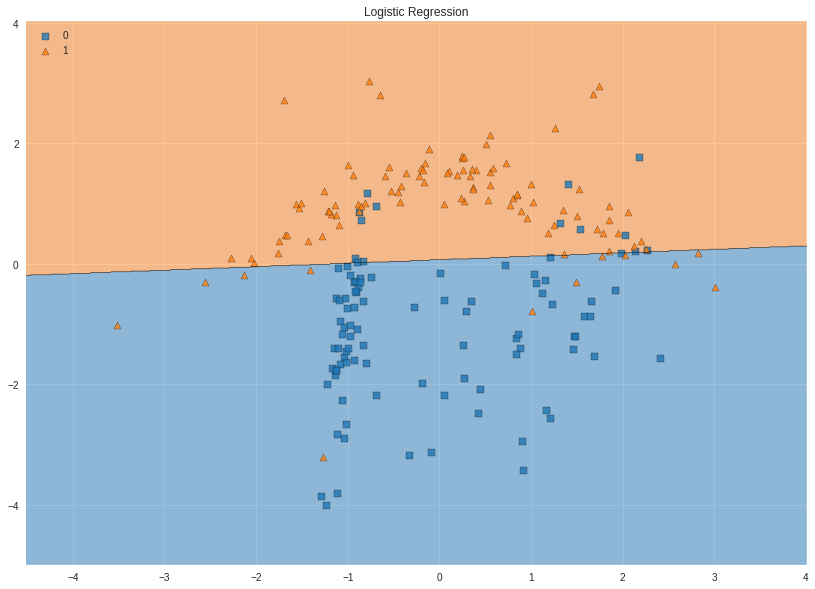

In [ ]:
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(14,10))

label = 'Logistic Regression'
clf = LogisticRegression()
clf.fit(X,y)

fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.title(label)
plt.show()

### Theory Questions

1. What Linear Regression training algorithm can you use if you have a training set
with millions of features?

  You could use batch gradient descent, stochastic gradient descent, or mini-batch gradient descent. SGD and MBGD would work the best because neither of them needs to load the entire dataset into memory in order to take 1 step of gradient descent. Batch would be ok with the caveat that you have enough memory to load all the data.

  The normal equations method would not be a good choice because it is computationally inefficient. The main cause of the computational complexity comes from the inverse operation on an (n x n) matrix.

2. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

  Both Mini-batch and Stochastic gradient descent are not guaranteed to minimize the cost function after each step because they both have a degree of randomness built into them. Mini-bath randomly chooses which training examples to perform gradient descent on while Stochastic randomly chooses a single example. A better option is to save the model at regular intervals. When the model has not improved for a long time you can revert to the saved models.

3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

  Gradient descent produces a convex-shaped graph that only has one global optimum. Therefore, it cannot get stuck in a local minimum.

4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

  No. The issue is that stochastic gradient descent and mini-batch gradient descent have randomness built into them. This means that they can find their way to nearby the global optimum, but they generally don't converge. One way to help them converge is to gradually reduce the learning rate hyperparameter.

5. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime, should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

  Softmax regression does not handle multiple output classes (i.e. [indoor, daytime]). So you'll need to use two logistic regression classifiers.
